# 10 minutes to pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

This is a short introduction to pandas, geared mainly for new users. 

Customarily, we import as follows:

In [1]:
import numpy as np

import pandas as pd

# Object creation

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])


In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [4]:
dates = pd.date_range("20130101", periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [7]:
df

,A,B,C,D
2013-01-01,-1.744677,-0.831805,0.471980,0.839687
2013-01-02,-0.364134,0.177735,-0.403066,0.127082
2013-01-03,0.292946,-1.835909,-1.967898,0.193353
2013-01-04,0.615452,-1.076150,-1.149906,1.751648
2013-01-05,-0.109676,0.298637,-0.030084,0.432842
2013-01-06,-1.240034,-1.399758,-1.104558,-0.244358


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [8]:
df2 = pd.DataFrame(
     {
         "A": 1.0,
         "B": pd.Timestamp("20130102"),
         "C": pd.Series(1, index=list(range(4)), dtype="float32"),
         "D": np.array([3] * 4, dtype="int32"),
         "E": pd.Categorical(["test", "train", "test", "train"]),
         "F": "foo",
     }
 )

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing data

Here is how to view the top and bottom rows of the frame:

In [11]:
df.head()

,A,B,C,D
2013-01-01,-1.744677,-0.831805,0.471980,0.839687
2013-01-02,-0.364134,0.177735,-0.403066,0.127082
2013-01-03,0.292946,-1.835909,-1.967898,0.193353
2013-01-04,0.615452,-1.076150,-1.149906,1.751648
2013-01-05,-0.109676,0.298637,-0.030084,0.432842


In [12]:
df.tail(4)

,A,B,C,D
2013-01-03,0.292946,-1.835909,-1.967898,0.193353
2013-01-04,0.615452,-1.076150,-1.149906,1.751648
2013-01-05,-0.109676,0.298637,-0.030084,0.432842
2013-01-06,-1.240034,-1.399758,-1.104558,-0.244358


Display the index, columns:

In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [15]:
df.to_numpy()

array([[-1.74467744, -0.83180516,  0.47198036,  0.83968679],
       [-0.36413363,  0.17773531, -0.40306563,  0.12708187],
       [ 0.2929456 , -1.83590884, -1.96789767,  0.19335303],
       [ 0.61545151, -1.07614952, -1.14990563,  1.75164774],
       [-0.10967591,  0.29863723, -0.03008386,  0.43284244],
       [-1.24003395, -1.39975752, -1.1045583 , -0.24435828]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

In [16]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

# Note:

**DataFrame.to_numpy()** does not include the index or column labels in the output.

**describe()** shows a quick statistic summary of your data:

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.425021,-0.777875,-0.697255,0.516709
std,0.906305,0.856752,0.881374,0.703138
min,-1.744677,-1.835909,-1.967898,-0.244358
25%,-1.021059,-1.318856,-1.138569,0.143650
50%,-0.236905,-0.953977,-0.753812,0.313098
75%,0.192290,-0.074650,-0.123329,0.737976
max,0.615452,0.298637,0.471980,1.751648


Transposing your data:

In [18]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.744677,-0.364134,0.292946,0.615452,-0.109676,-1.240034
B,-0.831805,0.177735,-1.835909,-1.076150,0.298637,-1.399758
C,0.471980,-0.403066,-1.967898,-1.149906,-0.030084,-1.104558
D,0.839687,0.127082,0.193353,1.751648,0.432842,-0.244358


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,6.0,-0.425021,0.906305,-1.744677,-1.021059,-0.236905,0.192290,0.615452
B,6.0,-0.777875,0.856752,-1.835909,-1.318856,-0.953977,-0.074650,0.298637
C,6.0,-0.697255,0.881374,-1.967898,-1.138569,-0.753812,-0.123329,0.471980
D,6.0,0.516709,0.703138,-0.244358,0.143650,0.313098,0.737976,1.751648


Sorting by an axis:

In [20]:
 df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.839687,0.471980,-0.831805,-1.744677
2013-01-02,0.127082,-0.403066,0.177735,-0.364134
2013-01-03,0.193353,-1.967898,-1.835909,0.292946
2013-01-04,1.751648,-1.149906,-1.076150,0.615452
2013-01-05,0.432842,-0.030084,0.298637,-0.109676
2013-01-06,-0.244358,-1.104558,-1.399758,-1.240034


Sorting by values:

In [21]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,0.292946,-1.835909,-1.967898,0.193353
2013-01-06,-1.240034,-1.399758,-1.104558,-0.244358
2013-01-04,0.615452,-1.076150,-1.149906,1.751648
2013-01-01,-1.744677,-0.831805,0.471980,0.839687
2013-01-02,-0.364134,0.177735,-0.403066,0.127082
2013-01-05,-0.109676,0.298637,-0.030084,0.432842


# Selection:

## Getting

Selecting a single column, which yields a Series, equivalent to df.A:

In [22]:
df["A"]

2013-01-01   -1.744677
2013-01-02   -0.364134
2013-01-03    0.292946
2013-01-04    0.615452
2013-01-05   -0.109676
2013-01-06   -1.240034
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,-1.744677,-0.831805,0.471980,0.839687
2013-01-02,-0.364134,0.177735,-0.403066,0.127082
2013-01-03,0.292946,-1.835909,-1.967898,0.193353


In [24]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.364134,0.177735,-0.403066,0.127082
2013-01-03,0.292946,-1.835909,-1.967898,0.193353
2013-01-04,0.615452,-1.076150,-1.149906,1.751648


## Selection by label

For getting a cross section using a label:

In [25]:
df.loc[dates[0]]

A   -1.744677
B   -0.831805
C    0.471980
D    0.839687
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [26]:
df.loc[:,["A","B"]]

,A,B
2013-01-01,-1.744677,-0.831805
2013-01-02,-0.364134,0.177735
2013-01-03,0.292946,-1.835909
2013-01-04,0.615452,-1.076150
2013-01-05,-0.109676,0.298637
2013-01-06,-1.240034,-1.399758


Showing label slicing, both endpoints are included:

In [27]:
df.loc["20130102":"20130104", ["A","B"]]

,A,B
2013-01-02,-0.364134,0.177735
2013-01-03,0.292946,-1.835909
2013-01-04,0.615452,-1.076150


Reduction in the dimensions of the returned object:

In [28]:
df.loc["20130102", ["A","B"]]

A   -0.364134
B    0.177735
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [29]:
df.loc[dates[0], "A"]

-1.744677442016374

For getting fast access to a scalar (equivalent to the prior method):

In [30]:
df.at[dates[0], "A"]

-1.744677442016374

## Selection by position

Select via the position of the passed integers:

In [31]:
df.iloc[3]

A    0.615452
B   -1.076150
C   -1.149906
D    1.751648
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/Python:

In [32]:
df.iloc[3:5 , 0:2]

,A,B
2013-01-04,0.615452,-1.076150
2013-01-05,-0.109676,0.298637


By lists of integer position locations, similar to the NumPy/Python style:

In [33]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.364134,-0.403066
2013-01-03,0.292946,-1.967898
2013-01-05,-0.109676,-0.030084


For slicing rows explicitly:

In [34]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.364134,0.177735,-0.403066,0.127082
2013-01-03,0.292946,-1.835909,-1.967898,0.193353


For slicing columns explicitly:

In [35]:
df.iloc[ : , 1:3 ]

,B,C
2013-01-01,-0.831805,0.471980
2013-01-02,0.177735,-0.403066
2013-01-03,-1.835909,-1.967898
2013-01-04,-1.076150,-1.149906
2013-01-05,0.298637,-0.030084
2013-01-06,-1.399758,-1.104558


For getting a value explicitly:

In [36]:
df.iloc[1,1]

0.1777353086461852

For getting fast access to a scalar (equivalent to the prior method):

In [37]:
df.iat[1,1]

0.1777353086461852

# Boolean indexing

Using a single column’s values to select data.

In [38]:
df[df["A"] > 0]

,A,B,C,D
2013-01-03,0.292946,-1.835909,-1.967898,0.193353
2013-01-04,0.615452,-1.076150,-1.149906,1.751648


Selecting values from a DataFrame where a boolean condition is met.

In [39]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.47198,0.839687
2013-01-02,NaN,0.177735,NaN,0.127082
2013-01-03,0.292946,NaN,NaN,0.193353
2013-01-04,0.615452,NaN,NaN,1.751648
2013-01-05,NaN,0.298637,NaN,0.432842
2013-01-06,NaN,NaN,NaN,NaN


Using the isin() method for filtering:

In [40]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,-1.744677,-0.831805,0.471980,0.839687,one
2013-01-02,-0.364134,0.177735,-0.403066,0.127082,one
2013-01-03,0.292946,-1.835909,-1.967898,0.193353,two
2013-01-04,0.615452,-1.076150,-1.149906,1.751648,three
2013-01-05,-0.109676,0.298637,-0.030084,0.432842,four
2013-01-06,-1.240034,-1.399758,-1.104558,-0.244358,three


In [41]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.292946,-1.835909,-1.967898,0.193353,two
2013-01-05,-0.109676,0.298637,-0.030084,0.432842,four


# Setting

Setting a new column automatically aligns the data by the indexes.

In [42]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [43]:
df["F"] = s1

Setting values by label:

In [44]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [45]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [46]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations.

In [47]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.471980,5,NaN
2013-01-02,-0.364134,0.177735,-0.403066,5,1.0
2013-01-03,0.292946,-1.835909,-1.967898,5,2.0
2013-01-04,0.615452,-1.076150,-1.149906,5,3.0
2013-01-05,-0.109676,0.298637,-0.030084,5,4.0
2013-01-06,-1.240034,-1.399758,-1.104558,5,5.0


A where operation with setting.

In [48]:
df3 = df.copy()


In [49]:
df3[df3>0] = - df3

In [50]:
df3

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.471980,-5,NaN
2013-01-02,-0.364134,-0.177735,-0.403066,-5,-1.0
2013-01-03,-0.292946,-1.835909,-1.967898,-5,-2.0
2013-01-04,-0.615452,-1.076150,-1.149906,-5,-3.0
2013-01-05,-0.109676,-0.298637,-0.030084,-5,-4.0
2013-01-06,-1.240034,-1.399758,-1.104558,-5,-5.0


# Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [51]:
df4 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])


In [52]:
df4.loc[dates[0] : dates[1], "E"] = 1

In [53]:
df4

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.471980,5,NaN,1.0
2013-01-02,-0.364134,0.177735,-0.403066,5,1.0,1.0
2013-01-03,0.292946,-1.835909,-1.967898,5,2.0,NaN
2013-01-04,0.615452,-1.076150,-1.149906,5,3.0,NaN


To drop any rows that have missing data.

In [54]:
df4.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.364134,0.177735,-0.403066,5,1.0,1.0


Filling missing data.

In [55]:
df4.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.471980,5,5.0,1.0
2013-01-02,-0.364134,0.177735,-0.403066,5,1.0,1.0
2013-01-03,0.292946,-1.835909,-1.967898,5,2.0,5.0
2013-01-04,0.615452,-1.076150,-1.149906,5,3.0,5.0


To get the boolean mask where values are nan.

In [58]:
pd.isnull(df4)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# OPERATIONS

## Stats

Operations in general exclude missing data

Performing a descriptive statistic

In [59]:
df.mean()

A   -0.134241
B   -0.639241
C   -0.697255
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [60]:
df.mean(1)

2013-01-01    1.367995
2013-01-02    1.082107
2013-01-03    0.697828
2013-01-04    1.277879
2013-01-05    1.831775
2013-01-06    1.251130
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas
automatically broadcasts along the specified dimension.

In [61]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [62]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.707054,-2.835909,-2.967898,4.0,1.0
2013-01-04,-2.384548,-4.076150,-4.149906,2.0,0.0
2013-01-05,-5.109676,-4.701363,-5.030084,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

Applying functions to the data

In [64]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.471980,5,NaN
2013-01-02,-0.364134,0.177735,0.068915,10,1.0
2013-01-03,-0.071188,-1.658174,-1.898983,15,3.0
2013-01-04,0.544263,-2.734323,-3.048889,20,6.0
2013-01-05,0.434588,-2.435686,-3.078972,25,10.0
2013-01-06,-0.805446,-3.835443,-4.183531,30,15.0


In [65]:
df.apply(lambda x: x.max() - x.min())

A    1.855485
B    2.134546
C    2.439878
D    0.000000
F    4.000000
dtype: float64

Histogramming

In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [67]:
s

0    5
1    6
2    3
3    4
4    2
5    3
6    3
7    3
8    1
9    1
dtype: int32

In [69]:
s.value_counts()

3    4
1    2
6    1
5    1
4    1
2    1
dtype: int64

## String Method

Series is equipped with a set of string processing methods in the str attribute that make it easy to
operate on each element of the array, as in the code snippet below. Note that patternmatching
in
str generally uses regular expressions by default (and in some cases always uses them).

In [72]:
s = pd.Series(['A', 'B', 'C', 'Aa145ba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0          a
1          b
2          c
3    aa145ba
4       baca
5        NaN
6       caba
7        dog
8        cat
dtype: object

## Merge

### Concat

Pandas provides various facilities for easily combining together Series, DataFrame, and Panel
objects with various kinds of set logic for the indexes and relational algebra functionality in the case
of join / mergetype
operations.

Concatenating pandas objects together with **concat()**:

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))

In [74]:
df

,0,1,2,3
0,-0.413489,-0.083250,-0.386459,-0.526684
1,1.089689,-1.344719,-0.883655,-0.465499
2,2.126958,1.144833,-0.777814,-0.714930
3,-0.412963,0.677456,0.183336,0.798581
4,0.137991,-0.462082,0.443873,0.306233
5,-0.754141,3.095267,-0.266004,-0.169152
6,0.650110,0.119068,1.056267,-0.178717
7,0.312168,-0.964407,-0.203453,0.481424
8,-0.835882,-0.202782,-0.938147,0.086500
9,0.599755,-0.221581,1.381449,0.925163


break it into pieces

In [75]:
pieces = [df[:3], df[3:7], df[7:]]

In [76]:
pieces

[          0         1         2         3
 0 -0.413489 -0.083250 -0.386459 -0.526684
 1  1.089689 -1.344719 -0.883655 -0.465499
 2  2.126958  1.144833 -0.777814 -0.714930,
           0         1         2         3
 3 -0.412963  0.677456  0.183336  0.798581
 4  0.137991 -0.462082  0.443873  0.306233
 5 -0.754141  3.095267 -0.266004 -0.169152
 6  0.650110  0.119068  1.056267 -0.178717,
           0         1         2         3
 7  0.312168 -0.964407 -0.203453  0.481424
 8 -0.835882 -0.202782 -0.938147  0.086500
 9  0.599755 -0.221581  1.381449  0.925163]

In [77]:
pd.concat(pieces)

,0,1,2,3
0,-0.413489,-0.083250,-0.386459,-0.526684
1,1.089689,-1.344719,-0.883655,-0.465499
2,2.126958,1.144833,-0.777814,-0.714930
3,-0.412963,0.677456,0.183336,0.798581
4,0.137991,-0.462082,0.443873,0.306233
5,-0.754141,3.095267,-0.266004,-0.169152
6,0.650110,0.119068,1.056267,-0.178717
7,0.312168,-0.964407,-0.203453,0.481424
8,-0.835882,-0.202782,-0.938147,0.086500
9,0.599755,-0.221581,1.381449,0.925163


## Join

SQL style merges:

In [78]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [79]:
left

,key,lval
0,foo,1
1,foo,2


In [80]:
right

,key,rval
0,foo,4
1,foo,5


In [81]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append

Append rows to a dataframe:

In [82]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [83]:
df

,A,B,C,D
0,-0.252957,0.817744,1.249054,-0.223648
1,-0.293919,0.860053,0.601279,-0.767245
2,-0.497805,-0.475085,1.171783,-0.522102
3,1.646678,-0.654469,0.300434,0.913126
4,-0.507053,0.198421,-0.637120,-1.525977
5,-0.190540,1.795615,-0.553091,0.537653
6,-0.028127,1.952557,1.730198,-0.322204
7,0.141377,-0.246424,-1.790340,-0.729084


In [84]:
s = df.iloc[3]

In [85]:
s

A    1.646678
B   -0.654469
C    0.300434
D    0.913126
Name: 3, dtype: float64

In [86]:
df.append(s, ignore_index=True)
df

,A,B,C,D
0,-0.252957,0.817744,1.249054,-0.223648
1,-0.293919,0.860053,0.601279,-0.767245
2,-0.497805,-0.475085,1.171783,-0.522102
3,1.646678,-0.654469,0.300434,0.913126
4,-0.507053,0.198421,-0.637120,-1.525977
5,-0.190540,1.795615,-0.553091,0.537653
6,-0.028127,1.952557,1.730198,-0.322204
7,0.141377,-0.246424,-1.790340,-0.729084


## Grouping

By **“group by”** we are referring to a process involving one or more of the following steps:

* **Spliting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure


    
    

In [87]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
  'foo', 'bar', 'foo', 'foo'],
  'B' : ['one', 'one', 'two', 'three',
  'two', 'two', 'one', 'three'],
  'C' : np.random.randn(8),
  'D' : np.random.randn(8)})

In [88]:
df

,A,B,C,D
0,foo,one,2.673799,-0.481945
1,bar,one,0.766243,-0.461450
2,foo,two,-0.263031,-0.254574
3,bar,three,0.790620,0.652741
4,foo,two,-0.164926,-0.084822
5,bar,two,-0.995242,-1.152437
6,foo,one,2.519375,0.590569
7,foo,three,1.060221,1.196077


Grouping and then applying a function **sum** to the resulting groups:

In [89]:
df.groupby('A').sum()

,C,D
A,,
bar,0.561621,-0.961146
foo,5.825437,0.965306


In [90]:
df.groupby('B').sum()

,C,D
B,,
one,5.959417,-0.352826
three,1.850840,1.848818
two,-1.423199,-1.491832


Grouping by multiple columns forms a hierarchical index, which we then apply the function:

In [91]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.766243 -0.461450
    three  0.790620  0.652741
    two   -0.995242 -1.152437
foo one    5.193174  0.108624
    three  1.060221  1.196077
    two   -0.427958 -0.339395

In [92]:
df.groupby(["B", "A"]).sum()

C         D
B     A                      
one   bar  0.766243 -0.461450
      foo  5.193174  0.108624
three bar  0.790620  0.652741
      foo  1.060221  1.196077
two   bar -0.995242 -1.152437
      foo -0.427958 -0.339395

## Reshaping

### Stack

In [93]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
....: 'foo', 'foo', 'qux', 'qux'],
....: ['one', 'two', 'one', 'two',
....: 'one', 'two', 'one', 'two']]))

In [94]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [99]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [100]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.276327  0.752402
      two    -1.692608  1.603314
baz   one    -0.872735 -0.015644
      two    -0.767861 -0.580339
foo   one    -2.989269 -0.658790
      two    -1.235173 -1.195888
qux   one     0.713215  1.278086
      two    -0.245796  0.166584

In [101]:
df2 = df[:4]

In [102]:
df2

A         B
first second                    
bar   one     1.276327  0.752402
      two    -1.692608  1.603314
baz   one    -0.872735 -0.015644
      two    -0.767861 -0.580339

The **stack()** method “compresses” a level in the DataFrame’s columns.

In [103]:
stacked = df2.stack()

In [104]:
stacked

first  second   
bar    one     A    1.276327
               B    0.752402
       two     A   -1.692608
               B    1.603314
baz    one     A   -0.872735
               B   -0.015644
       two     A   -0.767861
               B   -0.580339
dtype: float64

In [105]:
pd.DataFrame(stacked)

0
first second            
bar   one    A  1.276327
             B  0.752402
      two    A -1.692608
             B  1.603314
baz   one    A -0.872735
             B -0.015644
      two    A -0.767861
             B -0.580339

With a “stacked” DataFrame or Series (having a **MultiIndex** as the index), the inverse operation of
**stack()** is **unstack()**, which by default unstacks the last level:

In [106]:
stacked.unstack()

A         B
first second                    
bar   one     1.276327  0.752402
      two    -1.692608  1.603314
baz   one    -0.872735 -0.015644
      two    -0.767861 -0.580339

In [107]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.276327 -1.692608
      B  0.752402  1.603314
baz   A -0.872735 -0.767861
      B -0.015644 -0.580339

In [108]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.276327 -0.872735
       B  0.752402 -0.015644
two    A -1.692608 -0.767861
       B  1.603314 -0.580339

## Pivot Tables

In [111]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
 'B' : ['A', 'B', 'C'] * 4,
 'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
 'D' : np.random.randn(12),
 'E' : np.random.randn(12)})

In [112]:
df

,A,B,C,D,E
0,one,A,foo,-1.088925,-0.987628
1,one,B,foo,0.462720,-1.569542
2,two,C,foo,-2.016270,1.004499
3,three,A,bar,1.702302,0.277837
4,one,B,bar,-1.298410,-0.054690
5,one,C,bar,-0.551401,-0.455762
6,two,A,foo,-0.251668,0.392132
7,three,B,foo,0.907973,2.530640
8,one,C,foo,0.834075,0.665862
9,one,A,bar,0.915234,-0.551967


We can produce **pivot tables** from this data very easily:

In [113]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.915234 -1.088925
      B -1.298410  0.462720
      C -0.551401  0.834075
three A  1.702302       NaN
      B       NaN  0.907973
      C -1.227207       NaN
two   A       NaN -0.251668
      B -0.018477       NaN
      C       NaN -2.016270

## Time Series

Pandas has simple, powerful, and efficient functionality for performing resampling operations during
frequency conversion (e.g., converting secondly data into 5minutely
data). This is extremely
common in, but not limited to, financial applications

In [115]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    293
2012-01-01 00:00:01    179
2012-01-01 00:00:02    344
2012-01-01 00:00:03    225
2012-01-01 00:00:04    312
                      ... 
2012-01-01 00:01:35    311
2012-01-01 00:01:36    123
2012-01-01 00:01:37    115
2012-01-01 00:01:38    366
2012-01-01 00:01:39    388
Freq: S, Length: 100, dtype: int32

In [118]:
ts.resample('5Min')

### Time zone representation

In [119]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.025016
2012-03-07    0.648746
2012-03-08    0.734252
2012-03-09   -0.961653
2012-03-10   -0.047582
Freq: D, dtype: float64

In [120]:
ts_utc = ts.tz_localize('UTC')

In [121]:
ts_utc

2012-03-06 00:00:00+00:00    0.025016
2012-03-07 00:00:00+00:00    0.648746
2012-03-08 00:00:00+00:00    0.734252
2012-03-09 00:00:00+00:00   -0.961653
2012-03-10 00:00:00+00:00   -0.047582
Freq: D, dtype: float64

**Convert to another time zone**

In [122]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.652420
2012-02-29   -1.322267
2012-03-31   -0.886211
2012-04-30    1.456983
2012-05-31   -0.182816
Freq: M, dtype: float64

In [123]:
ps = ts.to_period()
ps

2012-01   -1.652420
2012-02   -1.322267
2012-03   -0.886211
2012-04    1.456983
2012-05   -0.182816
Freq: M, dtype: float64

In [124]:
ps.to_timestamp()

2012-01-01   -1.652420
2012-02-01   -1.322267
2012-03-01   -0.886211
2012-04-01    1.456983
2012-05-01   -0.182816
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be
used. In the following example, we convert a quarterly frequency with year ending in November to
9am of the end of the month following the quarter end:

In [128]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.874882
1990-06-01 09:00    0.306573
1990-09-01 09:00   -0.847248
1990-12-01 09:00   -0.456036
1991-03-01 09:00   -0.134274
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a **DataFrame**.

In [140]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a','a','e']})

Convert the raw grades to a categorical data type.

In [148]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to **Series.cat.categories()** is
inplace!)

In [149]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under **Series
.cat()** return a new **Series** per default).

In [150]:
df["grade"] = df["grade"].cat.set_categories(
        ["very bad", "bad", "medium", "good", "very good"]
    )
   

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [151]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [152]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [153]:
import matplotlib.pyplot as plt

In [154]:
plt.close("all")

In [155]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [156]:
ts = ts.cumsum()

<AxesSubplot:>

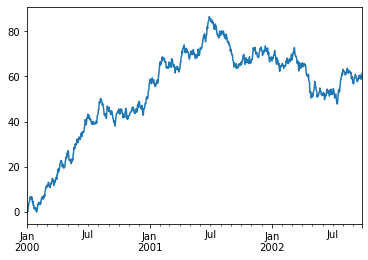

In [157]:
ts.plot()

On a DataFrame, the **plot()** method is a convenience to plot all of the columns with labels:

In [158]:
df = pd.DataFrame(
         np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
     )

In [159]:
df = df.cumsum()

In [160]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

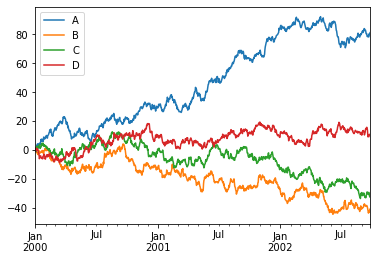

In [165]:
df.plot()
plt.legend(loc='best')

## Getting data in/out

## CSV

Writing to a csv file:

In [166]:
df.to_csv("10mpandas.csv")

Reading from a csv file:

In [167]:
pd.read_csv("10mpandas.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.178631,1.111784,-0.199663,0.811154
1,2000-01-02,1.201142,-0.312781,0.136687,0.833684
2,2000-01-03,0.745403,-1.341117,-1.220354,-0.715554
3,2000-01-04,1.972368,-0.887222,1.204752,-0.711136
4,2000-01-05,2.871741,-1.624489,2.280861,0.417210
...,...,...,...,...,...
995,2002-09-22,78.306685,-42.725967,-29.496898,9.949003
996,2002-09-23,80.377019,-43.324733,-30.879218,10.617475
997,2002-09-24,79.892450,-42.291434,-31.759696,10.750066
998,2002-09-25,80.869091,-41.407766,-32.707129,10.431640
